In [1]:
import re
import nltk

import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')

from sklearn.feature_selection.univariate_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import random
import itertools

import sys
import os
import argparse
from sklearn.pipeline import Pipeline
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
import six
import tensorflow
from abc import ABCMeta
from scipy import sparse
from scipy.sparse import issparse
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import check_X_y, check_array
from sklearn.utils.extmath import safe_sparse_dot
from sklearn.preprocessing import normalize, binarize, LabelBinarizer
from sklearn.svm import LinearSVC

from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Lambda
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, SimpleRNN, GRU
from keras.preprocessing.text import Tokenizer
from collections import defaultdict
from keras.layers.convolutional import Convolution1D
from keras import backend as K

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.font_manager as fm
import matplotlib
%matplotlib inline
plt.style.use('ggplot')

font_location = 'C:/Windows/Fonts/malgunsl.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font' , family=font_name)

import sklearn.metrics as metrics
import warnings


from sklearn.datasets import load_boston
import xgboost
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score
from xgboost import plot_importance
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings(action='ignore')

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.univariate_selection module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
Child_Abuser = pd.read_csv("./Child_Abuser_dum_final.csv",encoding = 'CP949')
Child_Abuser

,아동_위험점수,조대_재신고여부_1,조대_동일신고여부,조대_아동동거여부,판단_유형_신체,판단_유형_정서,판단_유형_성,판단_유형_방임,신고_접수연도,아특_난독해,...,행위_다문화가족_일반,행위_가구소득구분코_100만원이상-150만원미만,행위_가구소득구분코_150만원이상-200만원미만,행위_가구소득구분코_200만원이상-250만원미만,행위_가구소득구분코_250만원이상-300만원미만,행위_가구소득구분코_300만원이상,행위_가구소득구분코_50만원미만,행위_가구소득구분코_50만원이상~100만원미만,행위_기초생활수급유_비수급권대상,행위_기초생활수급유_수급권대상
0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2014.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2014.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2014.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2014.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,2014.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80090,3.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2018.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80091,3.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2018.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
80092,4.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2018.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
80093,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2018.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
for i in range(len(Child_Abuser.columns)):
    print(i, Child_Abuser.columns[i])

0 아동_위험점수
1 조대_재신고여부_1
2 조대_동일신고여부
3 조대_아동동거여부
4 판단_유형_신체
5 판단_유형_정서
6 판단_유형_성
7 판단_유형_방임
8 신고_접수연도
9 아특_난독해
10 아특_약물
11 아특_잦은결석
12 아특_양육지식부족
13 아특_늦은귀가
14 아특_잦은병치례
15 아특_성문제
16 아특_장애의심
17 아특_기타
18 아특_주의산만
19 아특_신체발달지연
20 아특_나태_무기력
21 아특_종교문제
22 아특_도벽
23 아특_무단결과
24 아특_호흡기장애
25 아특_사회적고립
26 아특_장루요루장애
27 아특_반항
28 아특_언어문제
29 아특_과잉행동
30 아특_폭력행동
31 아특_불건전또래관계
32 아특_지적장애
33 아특_가출
34 아특_전과력
35 아특_우울
36 아특_뇌병변장애
37 아특_인터넷게임중독
38 아특_배우자폭력
39 아특_청각장애
40 아특_안면장애
41 아특_정신질환및장애
42 아특_정서문제
43 아특_영양결핍
44 아특_대인관계기피
45 아특_흡연
46 아특_신체질환및장애
47 아특_원치않는아동
48 아특_간장애
49 아특_존속학대
50 아특_지체장애
51 아특_언어장애
52 아특_어릴적학대경험
53 아특_오락중독
54 아특_부부및가족갈등
55 아특_낮은자아존중감
56 아특_부적절양육태도
57 아특_정신장애
58 아특_탐식및결식
59 아특_비행집단활동
60 아특_충동
61 아특_틱장애
62 아특_학습문제
63 아특_성격및기질문제
64 아특_위생문제
65 아특_자폐성장애
66 아특_대소변문제
67 아특_애착문제
68 아특_허약
69 아특_경제적어려움
70 아특_급만성질병
71 아특_불안
72 아특_뇌전증장애
73 아특_신장장애
74 아특_학교부적응
75 아특_기타장애
76 아특_공격성
77 아특_알콜남용
78 아특_무력감
79 아특_스트레스
80 아특_거짓말
81 아특_시각장애
82 아특_특성없음
83 아특_난작문
84 아특_심장장애
85 아특_도박중독
86 아특_사회성문제
87 아특_음주
88 아조_기타

In [4]:
Child_Abuser.rename(columns = {'행위_병력_상세병명확인되지않았으나':'행위_병력_상세병명확인안됨',
                     '행위_병력_병원입원중임.':'행위_병력_병원입원중'}
                    , inplace = True)

In [5]:
Child_Abuser.columns = Child_Abuser.columns.str.replace('ㆍ','')
Child_Abuser.columns = Child_Abuser.columns.str.replace('·','')
Child_Abuser.columns = Child_Abuser.columns.str.replace('(','')
Child_Abuser.columns = Child_Abuser.columns.str.replace(')','')
Child_Abuser.columns = Child_Abuser.columns.str.replace('+','')
Child_Abuser.columns = Child_Abuser.columns.str.replace('~','')
Child_Abuser.columns = Child_Abuser.columns.str.replace('-','')
Child_Abuser.columns = Child_Abuser.columns.str.replace(',','')
Child_Abuser.columns = Child_Abuser.columns.str.replace("'",'')

# 1. 재학대혐의여부&변수선택 모델

In [6]:
col115 = ['조대_재신고여부_1',
'조대_동일신고여부',
'아특_장애의심',
'아특_뇌병변장애',
'아특_존속학대',
'아특_오락중독',
'아특_기타장애',
'아특_거짓말',
'아특_심장장애',
'행특_잦은병치례',
'행특_허약',
'행특_신체발달지연',
'행특_간장애',
'행특_흡연',
'행특_폭력행동',
'행특_탐식및결식',
'행특_영양결핍',
'행특_기타장애',
'행특_학교부적응',
'행특_애착문제',
'아동_병력_대퇴골두무혈성괴사',
'아동_병력_로이디에츠증후군',
'아동_병력_행실장애의심',
'아동_병력_결핵',
'아동_병력_지방간',
'아동_병력_중증뒤쉔근디스트로피',
'아동_병력_수신증',
'아동_병력_진단을내릴수없는희귀질환',
'아동_병력_분노조절장애',
'아동_병력_두개골골절',
'아동_병력_식도확장수술',
'아동_병력_진행성근이영양증',
'아동_병력_신경섬유종',
'아동_병력_타박상',
'아동_병력_뇌병변장애',
'아동_병력_야뇨증',
'아동_병력_뇌진탕',
'아동_병력_활동및주의력장애',
'아동_병력_무이증',
'아동_병력_뇌압상승질병',
'아동_병력_기도폐쇄증',
'행위_병력_자살충동',
'행위_병력_알츠하이머',
'행위_병력_갑상산',
'행위_병력_위암',
'행위_병력_자살및자해시도',
'행위_병력_과대망상',
'행위_병력_요추디스크',
'행위_병력_중풍',
'행위_병력_혈관성치매',
'행위_병력_우을증',
'행위_병력_외상후스트레스장애',
'행위_병력_상세병명확인안됨',
'행위_병력_동맥혈전',
'행위_병력_뇌경색',
'행위_병력_통풍',
'행위_병력_골수염',
'행위_병력_조현병',
'행위_병력_유방암',
'행위_병력_알콜성조발성치매',
'행위_병력_정신질환',
'행위_병력_뇌출혈',
'행위_병력_백반증',
'행위_병력_병원입원중',
'행위_병력_자궁암',
'행위_병력_편집성인격장애',
'행위_병력_혈액암',
'행위_병력_간경변',
'행위_병력_다운증후군',
'아동_위험유형_08',
'행위_위험유형_02',
'아동_내국인여부_외국인',
'아동_최종학력_초등중퇴',
'아동_직업유형_기술공 및 준전문가',
'아동_직업유형_사무종사자',
'아동_직업유형_서비스 및 판매종사자',
'아동_친권자유형_친권자 없음',
'아동_가족유형_소년소녀가정',
'아동_보호조치유형_1.0',
'신고_접수경로구분코_129',
'신고_접수경로구분코_1366',
'신고_접수경로구분코_기타',
'신고_접수경로구분코_내방',
'신고_접수경로구분코_상담원 인지신고',
'신고_접수경로구분코_아동보호전문기관일반전화',
'신고_접수경로구분코_아동행복지원  상담원인지신고',
'신고_접수경로구분코_인터넷',
'신고_신고자유형구분_신고의무자',
'신고_접수유형_아동학대 의심사례',
'신고_피해아동상태구_아동사망',
'신대_행위자아동관계_기타시설종사자',
'신대_행위자아동관계_베이비시터아이돌보미',
'신대_행위자아동관계_부모의 동거인',
'신대_행위자아동관계_어린이집보육교직원 종사자',
'신대_행위자아동관계_외조모',
'신대_행위자아동관계_위탁모',
'신대_행위자아동관계_유치원교사교직원 종사자',
'신대_행위자아동관계_이웃',
'신대_행위자아동관계_청소년관련시설종사자',
'신대_행위자아동관계_학교교원 교직원',
'신대_행위자아동관계_학원강사 종사자',
'신대_행위자아동관계_형제자매',
'신대_접수유형_동일신고',
'신대_접수유형_아동학대 의심사례',
'신대_접수유형_응급아동학대의심사례',
'신대_통계거점_세종',
'신대_통계거점_중앙',
'조사_집단시설내사건_교육기관',
'조대_재신고유형구분_동일센터 사례종결후 재신고',
'조대_재신고유형구분_사례진행중 재신고',
'조대_재신고유형구분_일반상담 후 재신고',
'조대_재신고유형구분_타센터 사례종결후 재신고',
'행위_직업유형_자영업',
'행위_직업유형_주부',
'행위_가족유형_부자가족사별']

In [7]:
X = Child_Abuser[col115]
X

,조대_재신고여부_1,조대_동일신고여부,아특_장애의심,아특_뇌병변장애,아특_존속학대,아특_오락중독,아특_기타장애,아특_거짓말,아특_심장장애,행특_잦은병치례,...,신대_통계거점_세종,신대_통계거점_중앙,조사_집단시설내사건_교육기관,조대_재신고유형구분_동일센터 사례종결후 재신고,조대_재신고유형구분_사례진행중 재신고,조대_재신고유형구분_일반상담 후 재신고,조대_재신고유형구분_타센터 사례종결후 재신고,행위_직업유형_자영업,행위_직업유형_주부,행위_가족유형_부자가족사별
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80092,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
80093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
X['신고_접수연도'] = Child_Abuser['신고_접수연도']

In [9]:
# X_train 지정
X_train = X[(X['신고_접수연도'] == 2014) | (X['신고_접수연도'] == 2015) | (X['신고_접수연도'] == 2016) | (X['신고_접수연도'] == 2017)]
X_train = X_train.drop('신고_접수연도',axis=1)

# X_test 지정
X_test = X[X['신고_접수연도'] == 2018]
X_test = X_test.drop('신고_접수연도',axis=1)
X_test

,조대_재신고여부_1,조대_동일신고여부,아특_장애의심,아특_뇌병변장애,아특_존속학대,아특_오락중독,아특_기타장애,아특_거짓말,아특_심장장애,행특_잦은병치례,...,신대_통계거점_세종,신대_통계거점_중앙,조사_집단시설내사건_교육기관,조대_재신고유형구분_동일센터 사례종결후 재신고,조대_재신고유형구분_사례진행중 재신고,조대_재신고유형구분_일반상담 후 재신고,조대_재신고유형구분_타센터 사례종결후 재신고,행위_직업유형_자영업,행위_직업유형_주부,행위_가족유형_부자가족사별
57838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80092,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
80093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
y = Child_Abuser[['New_재학대혐의여부','신고_접수연도']]
y

,New_재학대혐의여부,신고_접수연도
0,0.0,2014.0
1,0.0,2014.0
2,0.0,2014.0
3,0.0,2014.0
4,1.0,2014.0
...,...,...
80090,0.0,2018.0
80091,0.0,2018.0
80092,1.0,2018.0
80093,0.0,2018.0


In [11]:
y_train = y[(y['신고_접수연도'] == 2014) | (y['신고_접수연도'] == 2015) | (y['신고_접수연도'] == 2016) | (y['신고_접수연도'] == 2017)]
y_train = y_train.drop(['신고_접수연도'],axis=1)

y_test = y[(y['신고_접수연도'] == 2018)]
y_test = y_test.drop(['신고_접수연도'],axis=1)

y_train = y_train.astype(float)
y_test = y_test.astype(float)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(57838, 115)
(22257, 115)
(57838, 1)
(22257, 1)


## Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

Logit = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                    n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Logit.fit(X_train,y_train)
cp_list = []
y_list = []
y_pred = Logit.predict(X_test) # 임계점 0.5 
print("임계점 default(0.5)일 때 정확도 : " ,accuracy_score(y_test, y_pred),"\n") 

for i in range(1,10): # 임계점 0.3부터 0.6 구간까지 측정
    cp = i/10
    cp_list.append(cp)
    
    y_pred = (Logit.predict_proba(X_test)[:,1] >= cp).astype(bool) # 임계점 0.3
    y_list.append(accuracy_score(y_test, y_pred))
    
    print("임계점 %.1f 일때 정확도는 %.2f입니다." %(cp,accuracy_score(y_test, y_pred)))

print("\n가장 정확도가 높은 임계점은 %.1f입니다." %(cp_list[y_list.index(max(y_list))]))

임계점 default(0.5)일 때 정확도 :  0.8493956957361729 

임계점 0.1 일때 정확도는 0.68입니다.
임계점 0.2 일때 정확도는 0.82입니다.
임계점 0.3 일때 정확도는 0.83입니다.
임계점 0.4 일때 정확도는 0.86입니다.
임계점 0.5 일때 정확도는 0.85입니다.
임계점 0.6 일때 정확도는 0.85입니다.
임계점 0.7 일때 정확도는 0.84입니다.
임계점 0.8 일때 정확도는 0.83입니다.
임계점 0.9 일때 정확도는 0.81입니다.

가장 정확도가 높은 임계점은 0.4입니다.


In [14]:
print(Logit.score(X_train, y_train))

0.8811335108406239


In [15]:
print(Logit.score(X_test, y_test))

0.8493956957361729


In [16]:
print("훈련 세트 정확도 : {:.5f}".format(Logit.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.5f}".format(Logit.score(X_test,y_test)))

훈련 세트 정확도 : 0.88113
테스트 세트 정확도 : 0.84940


In [17]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))
    
get_clf_eval(y_test, y_pred)

오차행렬:
 [[17125    68]
 [ 4148   916]]

정확도: 0.8106
정밀도: 0.9309
재현율: 0.1809
F1: 0.3029
AUC: 0.5885


In [18]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

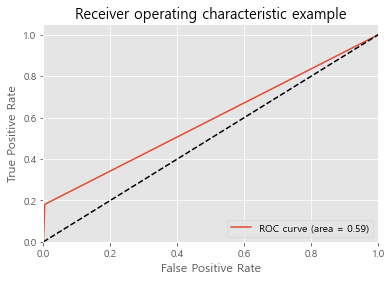

In [19]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Logistic Regression - 변수 중요도 확인

In [20]:
from matplotlib import pyplot

# get importance
importance = Logit.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.42847
Feature: 1, Score: 1.00674
Feature: 2, Score: 0.73252
Feature: 3, Score: 0.25919
Feature: 4, Score: 0.84125
Feature: 5, Score: -0.49328
Feature: 6, Score: -0.69225
Feature: 7, Score: 0.64033
Feature: 8, Score: -0.88814
Feature: 9, Score: -0.48557
Feature: 10, Score: -0.48557
Feature: 11, Score: 0.48236
Feature: 12, Score: -0.70164
Feature: 13, Score: -0.45277
Feature: 14, Score: -0.21390
Feature: 15, Score: 1.06373
Feature: 16, Score: -0.52703
Feature: 17, Score: -0.85409
Feature: 18, Score: 0.84032
Feature: 19, Score: -0.71026
Feature: 20, Score: 0.72865
Feature: 21, Score: 0.42311
Feature: 22, Score: 1.84055
Feature: 23, Score: 0.69357
Feature: 24, Score: 1.09355
Feature: 25, Score: 0.77634
Feature: 26, Score: 0.85933
Feature: 27, Score: 0.83105
Feature: 28, Score: 0.83510
Feature: 29, Score: 0.67255
Feature: 30, Score: 1.04083
Feature: 31, Score: 0.77634
Feature: 32, Score: -0.75889
Feature: 33, Score: 0.78357
Feature: 34, Score: 0.98385
Feature: 35, Score

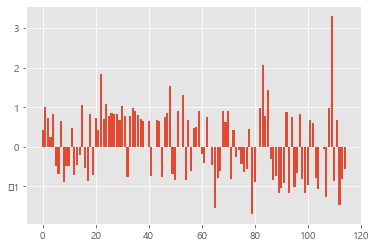

In [21]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Decision Tree

In [22]:
from sklearn import tree
Decision = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=10, max_features= 3)
Decision.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=3,
                       random_state=10)

In [23]:
print("훈련 세트 정확도 : {:.5f}".format(Decision.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.5f}".format(Decision.score(X_test,y_test)))

훈련 세트 정확도 : 0.85095
테스트 세트 정확도 : 0.84284


In [24]:
y_pred = Decision.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.84


In [25]:
pred_probs = Decision.predict(X_test)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
예측값 10개만 표시:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [26]:
get_clf_eval(y_test, pred_probs)

오차행렬:
 [[16238   955]
 [ 2543  2521]]

정확도: 0.8428
정밀도: 0.7253
재현율: 0.4978
F1: 0.5904
AUC: 0.7211


In [27]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

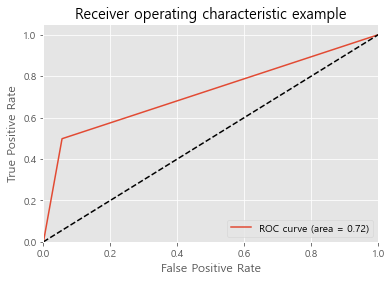

In [28]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Decision Tree - 변수 중요도

In [29]:
# get importance
importance =Decision.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.97869
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00086
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00015
Feature: 35, Score: 0.00000
Fe

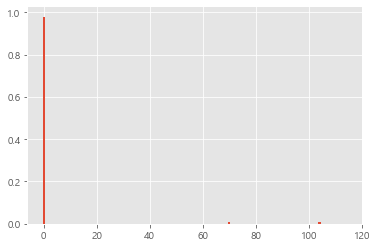

In [30]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Random Forest

In [31]:
forest = RandomForestClassifier(n_estimators=100,random_state=0,
                                max_depth = 5)
forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [32]:
print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,y_test)))

훈련 세트 정확도 : 0.859
테스트 세트 정확도 : 0.824


In [33]:
pred_probs = forest.predict(X_test)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
예측값 10개만 표시:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [34]:
get_clf_eval(y_test, preds)

오차행렬:
 [[17091   102]
 [ 3826  1238]]

정확도: 0.8235
정밀도: 0.9239
재현율: 0.2445
F1: 0.3866
AUC: 0.6193


In [35]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

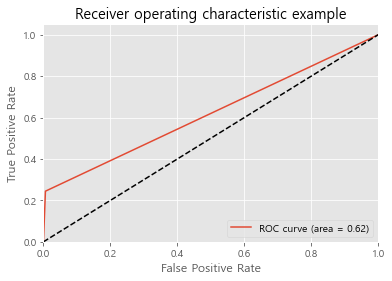

In [36]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Random Forest - 특성 중요도

In [37]:
def plot_feature_importances_child(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_)
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)


In [38]:
# get importance
importance = forest.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.24637
Feature: 1, Score: 0.00015
Feature: 2, Score: 0.01768
Feature: 3, Score: 0.00020
Feature: 4, Score: 0.00002
Feature: 5, Score: 0.00007
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.02703
Feature: 8, Score: 0.00001
Feature: 9, Score: 0.00001
Feature: 10, Score: 0.00001
Feature: 11, Score: 0.00009
Feature: 12, Score: 0.00005
Feature: 13, Score: 0.00007
Feature: 14, Score: 0.00032
Feature: 15, Score: 0.00004
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00004
Feature: 18, Score: 0.00005
Feature: 19, Score: 0.00006
Feature: 20, Score: 0.00004
Feature: 21, Score: 0.00018
Feature: 22, Score: 0.00042
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00011
Feature: 25, Score: 0.00005
Feature: 26, Score: 0.00002
Feature: 27, Score: 0.00002
Feature: 28, Score: 0.00011
Feature: 29, Score: 0.00002
Feature: 30, Score: 0.00005
Feature: 31, Score: 0.00003
Feature: 32, Score: 0.00001
Feature: 33, Score: 0.00001
Feature: 34, Score: 0.00008
Feature: 35, Score: 0.00040
Fe

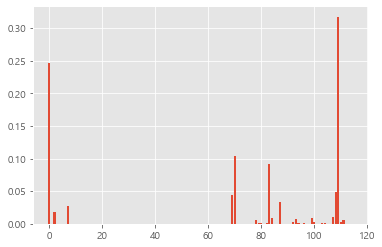

In [39]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## XGBOOST

In [40]:
import xgboost as xgb

epoch = 1000
learning_rate = 0.03
gamma = 0
subsampling = 0.6
max_depth = 5
xgb_model = xgboost.XGBClassifier(n_estimators = 100, learning_rate = learning_rate, 
                                 gamma = gamma, subsampling = subsampling,
                                 colsample_bytree = 1, max_depth = max_depth)

print(X_train.shape, y_train.shape)
xgb_model.fit(X_train, y_train)

(57838, 115) (57838, 1)
[09:39:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { subsampling } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.03, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              subsampling=0.6, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [41]:
dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [42]:
params = {'max_depth' : 4,
         'eta' : 0.005, 
         'objective' : 'binary:logistic',
         'eval_metric' : 'logloss',
         'early_stoppings' : 100 ,
         'sub_sample' : 0.3,
         'min_child_weight' : 5,
         'num_boost_around' : 10}

num_rounds = 100

In [43]:
wlist = [(dtrain, 'train'), (dtest,'eval')]
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[09:39:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stoppings, num_boost_around, sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.69000	eval-logloss:0.69025
[1]	train-logloss:0.68693	eval-logloss:0.68737
[2]	train-logloss:0.68386	eval-logloss:0.68453
[3]	train-logloss:0.68080	eval-logloss:0.68171
[4]	train-logloss:0.67781	eval-logloss:0.67893
[5]	train-logloss:0.67482	eval-logloss:0.67617
[6]	train-logloss:0.67189	eval-logloss:0.67344
[7]	train-logloss:0.66893	eval-logloss:0.67072
[8]	train-logloss:0.66609	eval-logloss:0.66805
[9]	train-logloss:0.66321	eval-logloss:0.66539
[10]	train-logloss:0.66039	eval-logloss:0.66277
[11]	train-logloss:0.65756	eval-logloss:0.66017
[12]	train-

In [44]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.319 0.319 0.319 0.319 0.319 0.426 0.319 0.426 0.319 0.426]
예측값 10개만 표시:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [45]:
get_clf_eval(y_test, preds)

오차행렬:
 [[16231   962]
 [ 2206  2858]]

정확도: 0.8577
정밀도: 0.7482
재현율: 0.5644
F1: 0.6434
AUC: 0.7542


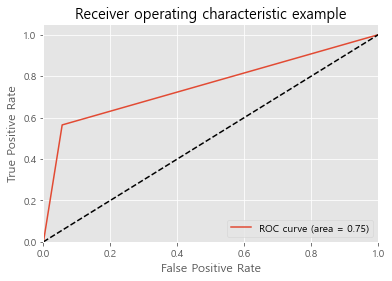

In [46]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## XGBOOST - 변수중요도

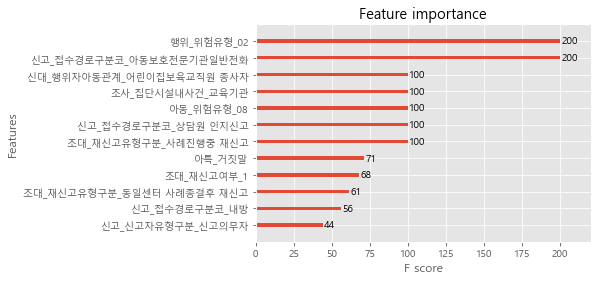

In [47]:
xgboost.plot_importance(xgb_model)

## SVM

In [48]:
# 시간걸림
from sklearn import svm

clf = svm.SVC(kernel ='linear',C=1,gamma=0.1)  
# C : 작게하면 train 분류 부정확하지만 margin크게 / 크게하면 margin작게 하지만 train분류 정확
# noise가 많은 데이터라면 C작게, Noise가 별로 없으면 C크게 하는게 좋다
clf.fit(X_train,y_train)

SVC(C=1, gamma=0.1, kernel='linear')

In [49]:
y_pred = clf.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.83


In [50]:
print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,y_test)))

훈련 세트 정확도 : 0.859
테스트 세트 정확도 : 0.824


In [51]:
get_clf_eval(y_test, y_pred)

오차행렬:
 [[17058   135]
 [ 3602  1462]]

정확도: 0.8321
정밀도: 0.9155
재현율: 0.2887
F1: 0.4390
AUC: 0.6404


In [52]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

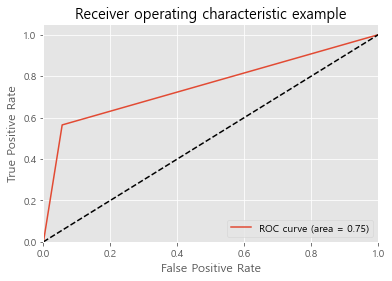

In [53]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## LightGBM

In [54]:
from lightgbm import LGBMClassifier

lgbm_wrapper=LGBMClassifier(n_estimators=400)

evals=[(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)

preds=lgbm_wrapper.predict(X_test)
pred_proba=lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	valid_0's binary_logloss: 0.498068
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.464345
[3]	valid_0's binary_logloss: 0.43982
[4]	valid_0's binary_logloss: 0.420792
[5]	valid_0's binary_logloss: 0.405599
[6]	valid_0's binary_logloss: 0.393489
[7]	valid_0's binary_logloss: 0.383518
[8]	valid_0's binary_logloss: 0.375284
[9]	valid_0's binary_logloss: 0.368421
[10]	valid_0's binary_logloss: 0.362452
[11]	valid_0's binary_logloss: 0.3575
[12]	valid_0's binary_logloss: 0.353332
[13]	valid_0's binary_logloss: 0.349835
[14]	valid_0's binary_logloss: 0.346763
[15]	valid_0's binary_logloss: 0.344249
[16]	valid_0's binary_logloss: 0.342176
[17]	valid_0's binary_logloss: 0.340108
[18]	valid_0's binary_logloss: 0.338374
[19]	valid_0's binary_logloss: 0.337092
[20]	valid_0's binary_logloss: 0.336077
[21]	valid_0's binary_logloss: 0.335141
[22]	valid_0's binary_logloss: 0.33431
[23]	valid_0's binary_logloss: 0.333684
[24]	valid_0's binary_logloss: 

In [55]:
get_clf_eval(y_test, preds)

오차행렬:
 [[16177  1016]
 [ 1969  3095]]

정확도: 0.8659
정밀도: 0.7529
재현율: 0.6112
F1: 0.6747
AUC: 0.7760


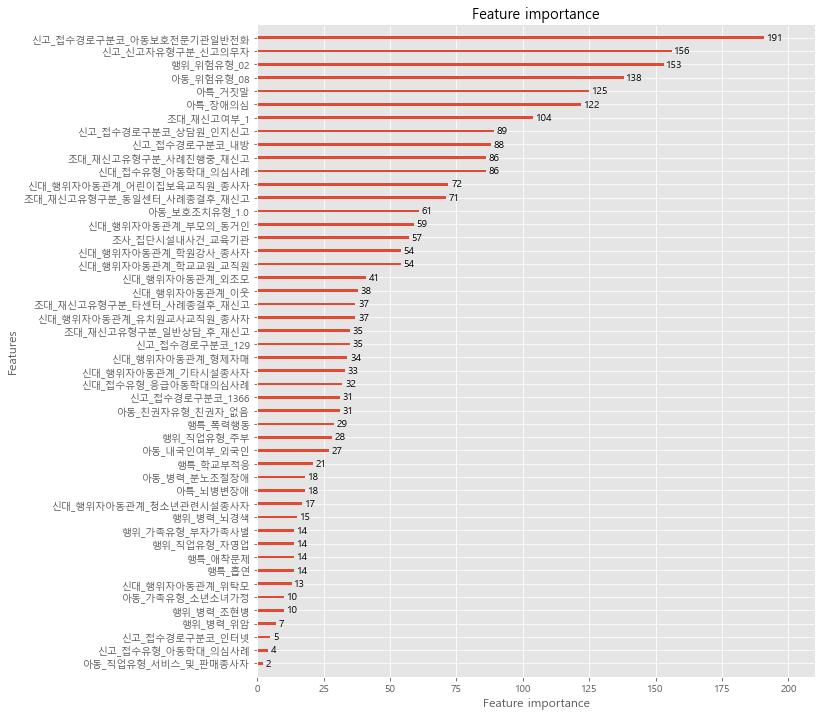

In [56]:
from lightgbm import plot_importance

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

## Catboost

In [57]:
from catboost import CatBoostClassifier

cb_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=4, l2_leaf_reg=20, 
                              bootstrap_type='Bernoulli', subsample=0.6, eval_metric='RMSE', metric_period=50, 
                              od_type='Iter', od_wait=45, random_seed=17, allow_writing_files=False) 

cb_model.fit(X_train, y_train)

preds = cb_model.predict(X_test)

CatBoostError: c:/program files (x86)/go agent/pipelines/buildmaster/catboost.git/catboost/private/libs/options/loss_description.cpp:376: metric [RMSE] is incompatible with loss [Logloss] (no binclass support)

In [ ]:
get_clf_eval(y_test, preds)